<a href="https://colab.research.google.com/github/Ari-Barros-Filho/Metodos_Numericos_Busca_Linear/blob/main/Metodos_Numericos_Busca_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Biblioteca para tratamento de números, matrizes e matemática
import numpy as np

# Biblioteca responsável pela criação de Dataframes (Tabelas)
import pandas as pd

# Biblioteca para a construção de gráficos
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Biblioteca para funções e equações
import sympy as sp
from sympy import I
import numexpr as ne

# Biblioteca responsável por apresentar o progresso em barras de códigos que apresentam repetições usando o comando 'for' ou 'while'
from tqdm import tqdm

In [2]:
# Definindo as variáveis da função
# x = x1, y = x2
x, y, alpha = sp.symbols('x y alpha')

# Funções auxiliares

In [3]:
# Deriva a função em relação a x e a y para encontrar o gradiente
def derivada(f):

    # Derivada da função em relação a x
    df_dx = sp.diff(f, x)

    # Derivada da função em relação a y
    df_dy = sp.diff(f, y)

    return df_dx, df_dy

In [4]:
# Iguala o gradiente a zero e resolve as equações para encontrar os pontos críticos (estacionários)
def resolve_equacao(df_dx, df_dy):

    # Iguala o gradiente a zero
    eq1 = sp.Eq(df_dx, 0)
    eq2 = sp.Eq(df_dy, 0)

    # Resolve o sistema de equações para encontrar os valores de 'x' e 'y'
    solucao = sp.solve((eq1, eq2), (x, y))

    return solucao

In [5]:
# Considera os pontos críticos aqueles sem valor imaginário
def filtra_pontos_criticos(solucao):
    lista_solucao_x = []
    lista_solucao_y = []

    for linha in solucao:

        # Verifica se o ponto possui valor imaginário tanto no eixo x como no y
        # Esse valor imaginário não pode existir ou deve ser muito pequeno
        tol_im = 0.0001
        if (np.abs(sp.im(linha[0].evalf())) <= tol_im) and (np.abs(sp.im(linha[1].evalf())) <= tol_im):
            lista_solucao_x.append(linha[0].evalf())
            lista_solucao_y.append(linha[1].evalf())

    return lista_solucao_x, lista_solucao_y

In [6]:
def ponto_direcao(x_inicial, y_inicial, df_dx, df_dy, direcao_x = 0, direcao_y = 0, direcao_gradiente = True):

    # Converte o ponto inicial em um vetor coluna
    ponto = np.array([x_inicial, y_inicial])
    ponto = ponto.reshape(2, -1)

    # Escolhe uma direção baseada no gradiente
    if direcao_gradiente:

        # Aplica o valor do ponto inicial no gradiente
        df_dx_com_ponto = df_dx.subs([(x, x_inicial), (y, y_inicial)])
        df_dy_com_ponto = df_dy.subs([(x, x_inicial), (y, y_inicial)])
        direcao = -np.array([df_dx_com_ponto, df_dy_com_ponto])

    # Escolhe uma direção específica
    else:
        direcao = -np.array([direcao_x, direcao_y])

    # Transforma o gradiente em direção e depois em vetor coluna
    direcao = direcao.reshape(2, -1)

    return ponto, direcao

In [7]:
def hessiana(df_dx, df_dy, lista_solucao_x, lista_solucao_y):

    # Diagonal principal
    fxx = sp.diff(df_dx, x)
    fyy = sp.diff(df_dy, y)

    # Diagonal secundária
    # Matematicamente são iguais
    fxy = sp.diff(df_dx, y)
    fyx = sp.diff(df_dy, x)

    for linha in range(len(lista_solucao_x)):

        x_critico = lista_solucao_x[linha]
        y_critico = lista_solucao_y[linha]

        fxx_com_valor = fxx.subs([(x, x_critico), (y, y_critico)])
        fyy_com_valor = fyy.subs([(x, x_critico), (y, y_critico)])
        fxy_com_valor = fxy.subs([(x, x_critico), (y, y_critico)])
        fyx_com_valor = fyx.subs([(x, x_critico), (y, y_critico)])

        # Calcula o determinante
        determinante = (fxx_com_valor * fyy_com_valor) - (fxy_com_valor * fyx_com_valor)

        # Se o determinante for positivo
        if determinante > 0:
            if fxx_com_valor > 0:
                print(f'Para o ponto estacionário ({x_critico:.2f},{y_critico:.2f}) é um ponto de mínimo global')

            else:
                print(f'Para o ponto estacionário ({x_critico:.2f},{y_critico:.2f}) é um ponto de máximo global')

        else:
            print(f'Para o ponto estacionário ({x_critico:.2f},{y_critico:.2f}) é um ponto de sela')

In [8]:
def xk1(ponto, direcao):

    # Operação de soma
    x_k1 = ponto + alpha * direcao

    return x_k1

In [9]:
def funcao_alpha(f, x_k1):

    x_1 = x_k1[0][0]
    y_1 = x_k1[1][0]

    funcao = f.subs([(x, x_1), (y, y_1)])

    return funcao

In [10]:
def resolvendo_funcao_alpha(f_derivada):

    # Definindo as equações
    eq1 = sp.Eq(f_derivada, 0)

    # Resolvendo o sistema de equações (Que pode ser gerado uma lista caso haja mais de uma solução)
    solucao_alpha = sp.solve(eq1, alpha)

    #=======================================================================================================

    # Cria uma lista vazia
    lista_solucao = []

    # Percorre todos os elementos da varivél 'solucao_alpha'
    for linha in solucao_alpha:

        # A solução é convertida para o tipo float. Ex.: (5/2) => 2.5
        # O alpha precisa ser maior que zero
        if sp.re(linha.evalf()) > 0:
            lista_solucao.append(sp.re(linha.evalf()))

    return lista_solucao

In [11]:
def funcao_proximo_ponto(x_k1, melhor_alpha):

    # Expressão com a variável simbólica
    expressao_1 = x_k1[0][0]

    x_proximo = expressao_1.subs(alpha, melhor_alpha)

    #========================================================================

    # Expressão com a variável simbólica
    expressao_2 = x_k1[1][0]

    y_proximo = expressao_2.subs(alpha, melhor_alpha)

    #========================================================================

    # Convertendo em vetor
    proximo_ponto = np.array([x_proximo, y_proximo])
    proximo_ponto = proximo_ponto.reshape(2, -1)

    return proximo_ponto

In [12]:
# Substitui o ponto na derivada
# Para um ponto estacionário o resultado será igual a zero
def tolerancia(ponto_x, ponto_y, df_dx, df_dy):

    df_dx_com_valor = df_dx.subs([(x, ponto_x), (y, ponto_y)])
    df_dy_com_valor = df_dy.subs([(x, ponto_x), (y, ponto_y)])

    valor = df_dx_com_valor**2 + df_dy_com_valor**2
    tolerancia = np.sqrt(float(valor))

    return tolerancia

# Condições Fortes de Wolfe e Interpolação Quadrática

## Decréscimo Suficiente

In [13]:
# f= Função
# proximo_ponto = ponto atual + alpha * direcao (O alpha já foi definido)
# ponto = ponto atual
# melhor_alpha = alpha definido
# df_dx = Função derivada em relação a x
# df_dy = Função derivada em relação a y
# direcao = pk

def decrescimo_suficiente(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c1 = 0.0001):

    fx1 = f.subs([(x, proximo_ponto[0][0]), (y, proximo_ponto[1][0])])
    fx0 = f.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    #===================================================================

    # Substitui as variáveis x e y do gradiente pelo valor do ponto atual
    df_dx = df_dx.subs([(x, ponto[0][0]), (y, ponto[1][0])])
    df_dy = df_dy.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    gradiente_transposto = np.array([df_dx, df_dy])
    gradiente_transposto = gradiente_transposto.reshape(-1, 2)
    gradiente_transposto = gradiente_transposto[0]

    #===================================================================

    la = fx0 + c1*melhor_alpha*((gradiente_transposto @ direcao)[0])

    if fx1 <= la:
        return True, fx1, la

    else:
        return False, fx1, la

## Condição de Curvatura

In [14]:
# f= Função
# proximo_ponto = ponto atual + alpha * direcao (O alpha já foi definido)
# ponto = ponto atual
# melhor_alpha = alpha definido
# df_dx = Função derivada em relação a x
# df_dy = Função derivada em relação a y
# direcao = pk

def condicao_curvatura(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c2 = 0.8):

    fx1 = f.subs([(x, proximo_ponto[0][0]), (y, proximo_ponto[1][0])])
    fx0 = f.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    #===================================================================

    # Substitui as variáveis x e y do gradiente pelo valor do ponto atual
    gradiente_x_1 = df_dx.subs([(x, proximo_ponto[0][0]), (y, proximo_ponto[1][0])])
    gradiente_y_1 = df_dy.subs([(x, proximo_ponto[0][0]), (y, proximo_ponto[1][0])])

    gradiente_transposto_1 = np.array([gradiente_x_1, gradiente_y_1])

    #===================================================================

    # Substitui as variáveis x e y do gradiente pelo valor do ponto atual
    gradiente_x_0 = df_dx.subs([(x, ponto[0][0]), (y, ponto[1][0])])
    gradiente_y_0 = df_dy.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    gradiente_transposto_0 = np.array([gradiente_x_0, gradiente_y_0])

    #===================================================================

    if np.abs(gradiente_transposto_1 @ direcao) <= (c2 * np.abs(gradiente_transposto_0 @ direcao)):
        return True, np.abs(gradiente_transposto_1 @ direcao), (c2 * np.abs(gradiente_transposto_0 @ direcao))

    else:
        return False, np.abs(gradiente_transposto_1 @ direcao), (c2 * np.abs(gradiente_transposto_0 @ direcao))

## Condições Fortes de Wolfe

In [15]:
# Realiza as duas condições necessária para a validação do alpha
# O alpha ficará em um loop onde será testado, e se falhar em pelo menos uma das condições será interpolado navamente
# Foi ficado uma quantidade máxima de tentativas, onde esse número foi obtido através de testes
# Isso significa que será tentado encontrar um alpha adequado no máximo 15 vezes
def condicoes_wolfe(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao):

    decrescimo, d1, d2 = decrescimo_suficiente(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c1 = 0.0001)
    curvatura, c1, c2 = condicao_curvatura(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c2 = 0.8)

    contador = 0

    if (decrescimo and curvatura) == False:

        while ((decrescimo and curvatura) == False):

            melhor_alpha = interpolacao_quadratica(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao)
            proximo_ponto = funcao_proximo_ponto(x_k1, melhor_alpha)

            decrescimo, d1, d2 = decrescimo_suficiente(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c1 = 0.0001)
            curvatura, c1, c2 = condicao_curvatura(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao, c2 = 0.8)

            contador = contador + 1

            if contador > 15:
                return proximo_ponto, melhor_alpha

        return proximo_ponto, melhor_alpha

    return proximo_ponto, melhor_alpha

## Interpolação Quadrática

In [16]:
# Função responsável por fazer a interpolação quadrática e encontrar um novo alpha
def interpolacao_quadratica(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao):

    fx1 = f.subs([(x, proximo_ponto[0][0]), (y, proximo_ponto[1][0])])
    fx0 = f.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    #===================================================================

    gradiente_x_0 = df_dx.subs([(x, ponto[0][0]), (y, ponto[1][0])])
    gradiente_y_0 = df_dy.subs([(x, ponto[0][0]), (y, ponto[1][0])])

    gradiente_transposto_0 = np.array([gradiente_x_0, gradiente_y_0])

    #===================================================================

    alpha_1 = -((gradiente_transposto_0.T @ direcao) * (melhor_alpha ** 2)) / (2 * (fx1 - fx0 - ((gradiente_transposto_0.T @ direcao)*melhor_alpha)))

    return np.abs(alpha_1[0])

# Método do Gradiente

## Identificando e classificando os pontos estacionários

In [17]:
# Definindo as variáveis da função
# x = x1, y = x2
x, y, alpha = sp.symbols('x y alpha')

# Definindo a função onde: x = x1 e y = x2
f = x**4 - 2*(x**2)*y + y**2 + x**2 - 2*x + 5

df_dx, df_dy = derivada(f)

solucao = resolve_equacao(df_dx, df_dy)

lista_solucao_x, lista_solucao_y = filtra_pontos_criticos(solucao)

hessiana(df_dx, df_dy, lista_solucao_x, lista_solucao_y)

Para o ponto estacionário (1.00,1.00) é um ponto de mínimo global


## Funçao principal

In [18]:
# Definindo as variáveis da função
# x = x1, y = x2
x, y, alpha = sp.symbols('x y alpha')

# Definindo a função onde: x = x1 e y = x2
f = x**4 - 2*(x**2)*y + y**2 + x**2 - 2*x + 5

# Definindo o ponto inicial
x_inicial, y_inicial = 1, 4

# True = As iterações serão encerradas assim que a tolerância for alcançada
# False = As iterações serão encerradas assim que a quantidade de iterações totais forem executadas
limitador_tolerancia = False

# Valor da tolerância
valor_limitador_tolerancia = 10**(-7)

#=======================================================================================================

# Listas onde serão armazenadas as variáveis
lista_tolerancia = []
lista_alpha = []
lista_x = []
lista_y = []

for _ in tqdm(range(200)):

    # Retorna a derivada da função em relação a x e y, em outras palavras, o gradiente
    df_dx, df_dy = derivada(f)

    # Retorna os vetores colunas do ponto e da direção
    ponto, direcao = ponto_direcao(x_inicial, y_inicial, df_dx, df_dy)

    # Retorna o próximo x_{k + 1} = x_k + alpha * direcao
    # Todas as variáveis já foram encontradas exceto o alpha
    x_k1 = xk1(ponto, direcao)

    # Utilizando o método de busca linear inexata
    melhor_alpha = 0.05 # 0.05  0.005

    # Subtitui o valor do alpha em x_{k + 1} = x_k + alpha * direcao, e encontra o próximo ponto
    proximo_ponto = funcao_proximo_ponto(x_k1, melhor_alpha)

    # Analisa-se se o alpha é adequado de modo a atender as condições, caso não seja, será realizada a busca de outro alpha através da interpolação
    proximo_ponto, melhor_alpha = condicoes_wolfe(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao)

    # Calcula a tolerância, substitui o ponto atual na derivada da função
    valor_tolerancia = tolerancia(float(x_inicial), float(y_inicial), df_dx, df_dy)

    # Adiciona os valores nas listas
    lista_tolerancia.append(valor_tolerancia)
    lista_alpha.append(melhor_alpha)
    lista_x.append(x_inicial)
    lista_y.append(y_inicial)

    # Verifica se as iterações serão interrompidas assim que a tolerância for alcançada ou não
    if limitador_tolerancia and (valor_tolerancia < valor_limitador_tolerancia):
        break

    # Atualiza o ponto
    x_inicial = float(proximo_ponto[0][0])
    y_inicial = float(proximo_ponto[1][0])

100%|██████████| 200/200 [00:08<00:00, 24.73it/s]


## Criação do Dataframe

In [19]:
df_gradiente = pd.DataFrame({'tolerancia': lista_tolerancia,
                  'alpha': lista_alpha,
                  'x': lista_x,
                  'y': lista_y})

display(df_gradiente)

,tolerancia,alpha,x,y
0,1.341641e+01,0.05,1.000000,4.000000
1,6.508427e+00,0.05,1.600000,3.700000
2,2.133286e+00,0.05,1.904800,3.586000
3,1.203030e+00,0.05,1.798219,3.590226
4,6.899383e-01,0.05,1.846658,3.554563
...,...,...,...,...
195,4.950428e-08,3.75602412242409e-15,1.000000,1.000000
196,4.950428e-08,3.75602412242409e-15,1.000000,1.000000
197,4.950428e-08,3.75602412242409e-15,1.000000,1.000000
198,4.950428e-08,3.75602412242409e-15,1.000000,1.000000


## Gráfico da tolerância

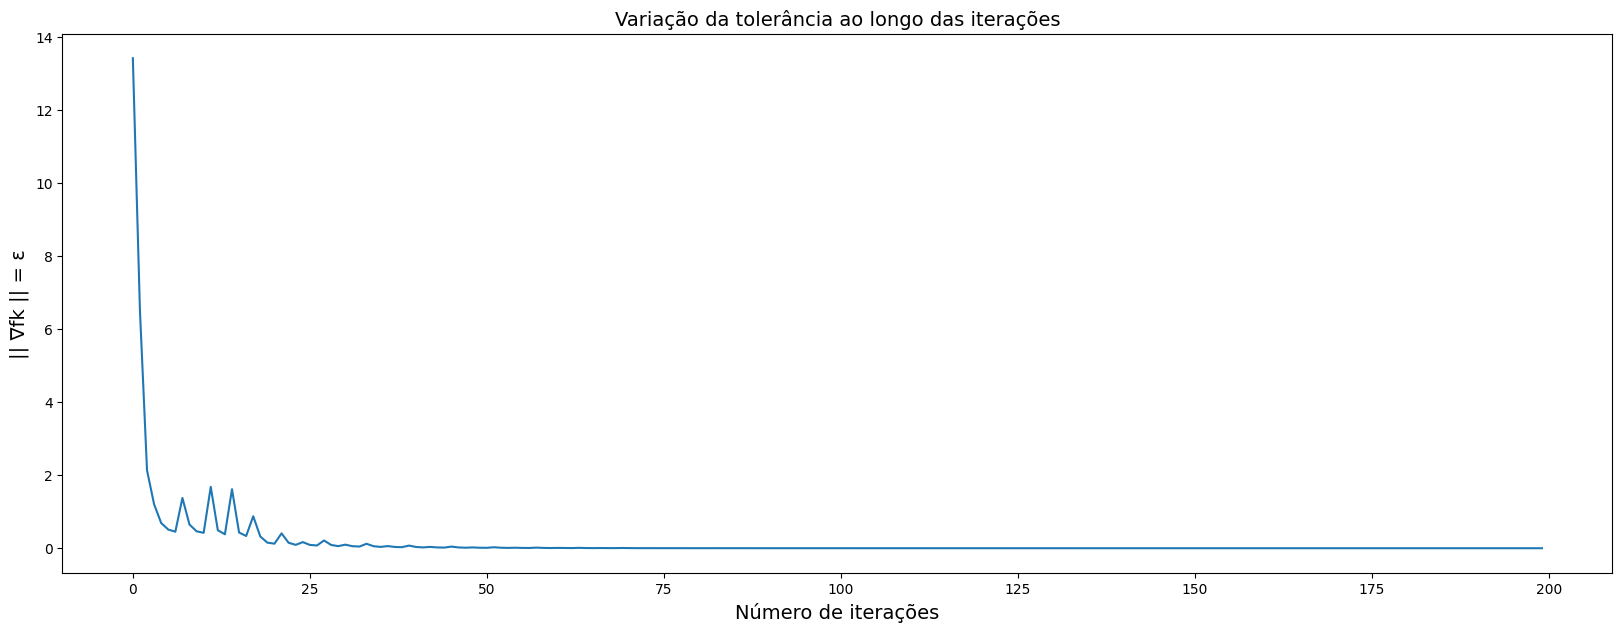

In [20]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_tolerancia)
plt.title('Variação da tolerância ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('|| ∇fk || = ε', fontsize = 14)
plt.savefig("03 - Método do Gradiente");

## Gráfico do alpha

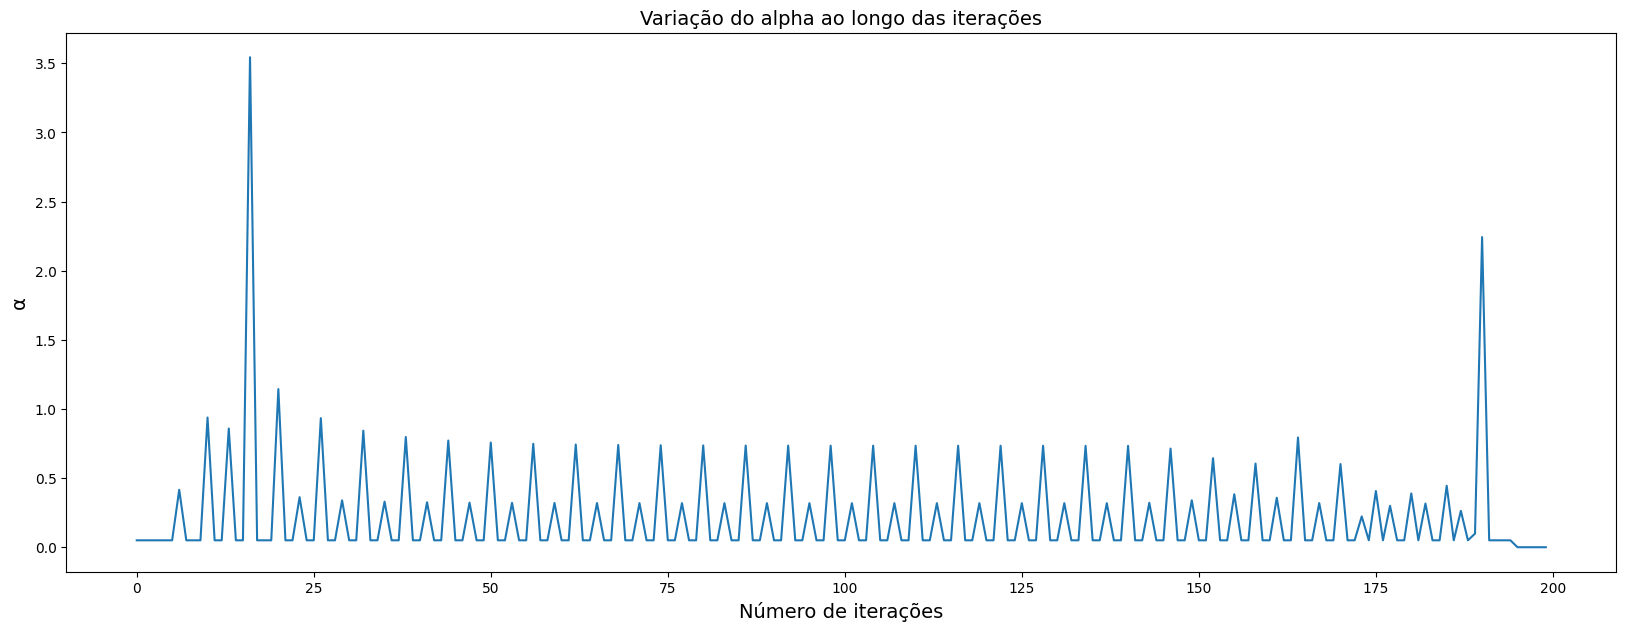

In [21]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_alpha)
plt.title('Variação do alpha ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('α', fontsize = 14)
plt.savefig("04 - Alpha");

## Gráfico da trajetória do ponto na curva de nível

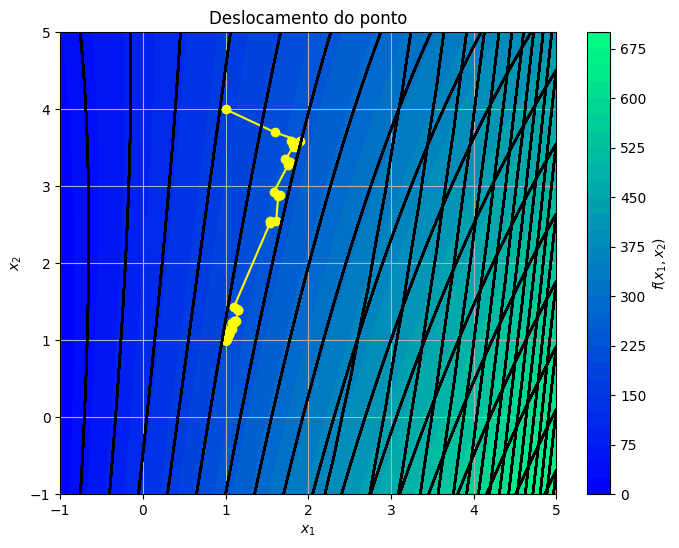

In [22]:
# Valor inicial do gráfico
valor_inicial = -1

# Valor final do gráfico
valor_final = 5

pontos = 30

equacao_matematica = 'x**4 - 2*(x**2)*(y) + y**2 + x**2 - 2*x + 5'

#============================================================================

vetor = np.linspace(valor_inicial, valor_final, pontos)
x, y = np.meshgrid(vetor, vetor)
z = ne.evaluate(equacao_matematica)

#============================================================================

# Gerar dados para o exemplo (por exemplo, uma função bidimensional)
X, Y = np.meshgrid(x, y)
Z = X**4 - 2*(X**2)*(Y) + Y**2 + X**2 - 2*X + 5


plt.figure(figsize=(8, 6))

plt.plot(lista_x, lista_y, marker='o', linestyle='-', color = 'yellow')

contour = plt.contourf(X, Y, Z, levels=30, cmap = 'winter')
plt.contour(X, Y, Z, colors='black', levels=20, alpha=0.7, linestyles = 'solid')

# plt.scatter(1, 4, color = 'red', s = 20, label = 'Ponto inicial')
# plt.scatter(1, 1, color = 'yellow', s = 20, label = 'Ponto estacionário')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Deslocamento do ponto')
plt.colorbar(contour, label = '$f(x_1, x_2)$')
# plt.legend()
plt.grid(True)
plt.savefig("02 - Mapa de contorno")
plt.show()

# Método de Newton

## Função auxiliar

In [23]:
def ponto_direcao_newton(x_inicial, y_inicial, df_dx, df_dy):

    # Converte o ponto inicial em um vetor coluna
    ponto = np.array([x_inicial, y_inicial])
    ponto = ponto.reshape(2, -1)

    #====================================================================================================

    # Diagonal principal
    fxx = sp.diff(df_dx, x)
    fyy = sp.diff(df_dy, y)

    # Diagonal secundária
    # Matematicamente são iguais
    fxy = sp.diff(df_dx, y)
    fyx = sp.diff(df_dy, x)

    fxx_com_valor = float(fxx.subs([(x, x_inicial), (y, y_inicial)]))
    fyy_com_valor = float(fyy.subs([(x, x_inicial), (y, y_inicial)]))
    fxy_com_valor = float(fxy.subs([(x, x_inicial), (y, y_inicial)]))
    fyx_com_valor = float(fyx.subs([(x, x_inicial), (y, y_inicial)]))

    matriz_hessiana = np.array([[fxx_com_valor, fxy_com_valor], [fyx_com_valor, fyy_com_valor]])
    inversa_hessiana = np.linalg.inv(matriz_hessiana)

    #====================================================================================================

    # Aplica o valor do ponto inicial no gradiente
    df_dx_com_ponto = float(df_dx.subs([(x, x_inicial), (y, y_inicial)]))
    df_dy_com_ponto = float(df_dy.subs([(x, x_inicial), (y, y_inicial)]))

    gradiente_0 = np.array([df_dx_com_ponto, df_dy_com_ponto])

    direcao = -(inversa_hessiana @ gradiente_0)

    # Transforma o gradiente em direção e depois em vetor coluna
    direcao = direcao.reshape(2, -1)

    return ponto, direcao

## Função principal

In [24]:
# Definindo as variáveis da função
x, y, alpha = sp.symbols('x y alpha')

# Definindo a função onde: x = x1 e y = x2
f = x**4 - 2*(x**2)*y + y**2 + x**2 - 2*x + 5

# Definindo o ponto inicial
x_inicial, y_inicial = 1, 4

# True = As iterações serão encerradas assim que a tolerância for alcançada
# False = As iterações serão encerradas assim que a quantidade de iterações totais forem executadas
limitador_tolerancia = False

# Valor da tolerância
valor_limitador_tolerancia = 10**(-7)

#==============================================================================

lista_tolerancia = []
lista_alpha = []
lista_x = []
lista_y = []

for _ in tqdm(range(100)):

    # Retorna a derivada da função em relação a x e y, em outras palavras, o gradiente
    df_dx, df_dy = derivada(f)

    # Retorna os vetores colunas do ponto e da direção
    ponto, direcao = ponto_direcao_newton(x_inicial, y_inicial, df_dx, df_dy)

    # Retorna o próximo x_{k + 1} = x_k + alpha * direcao
    # Todas as variáveis já foram encontradas exceto o alpha
    x_k1 = xk1(ponto, direcao)

    # Utilizando o método de busca linear inexata
    melhor_alpha = 0.005 # 0.05  0.005

    # Subtitui o valor do alpha em x_{k + 1} = x_k + alpha * direcao, e encontra o próximo ponto
    proximo_ponto = funcao_proximo_ponto(x_k1, melhor_alpha)

    proximo_ponto, melhor_alpha = condicoes_wolfe(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao)

    # Calcula a tolerância, substitui o ponto atual na derivada da função
    valor_tolerancia = tolerancia(float(x_inicial), float(y_inicial), df_dx, df_dy)

    # Adiciona os valores nas listas
    lista_tolerancia.append(valor_tolerancia)
    lista_alpha.append(melhor_alpha)
    lista_x.append(x_inicial)
    lista_y.append(y_inicial)

    # Verifica se as iterações serão interrompidas assim que a tolerância for alcançada ou não
    if limitador_tolerancia and (valor_tolerancia < valor_limitador_tolerancia):
        break

    x_inicial = float(proximo_ponto[0][0])
    y_inicial = float(proximo_ponto[1][0])

100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


## Criação do Dataframe

In [25]:
df_newton = pd.DataFrame({'tolerancia': lista_tolerancia,
                  'alpha': lista_alpha,
                  'x': lista_x,
                  'y': lista_y})

display(df_newton)

,tolerancia,alpha,x,y
0,1.341641e+01,0.999999999997766,1.0,4.0
1,2.996518e-11,7.71300558924203e-17,1.0,1.0
2,2.996518e-11,7.71300558924203e-17,1.0,1.0
3,2.996518e-11,7.71300558924203e-17,1.0,1.0
4,2.996518e-11,7.71300558924203e-17,1.0,1.0
...,...,...,...,...
95,2.996518e-11,7.71300558924203e-17,1.0,1.0
96,2.996518e-11,7.71300558924203e-17,1.0,1.0
97,2.996518e-11,7.71300558924203e-17,1.0,1.0
98,2.996518e-11,7.71300558924203e-17,1.0,1.0


## Gráfico da tolerância

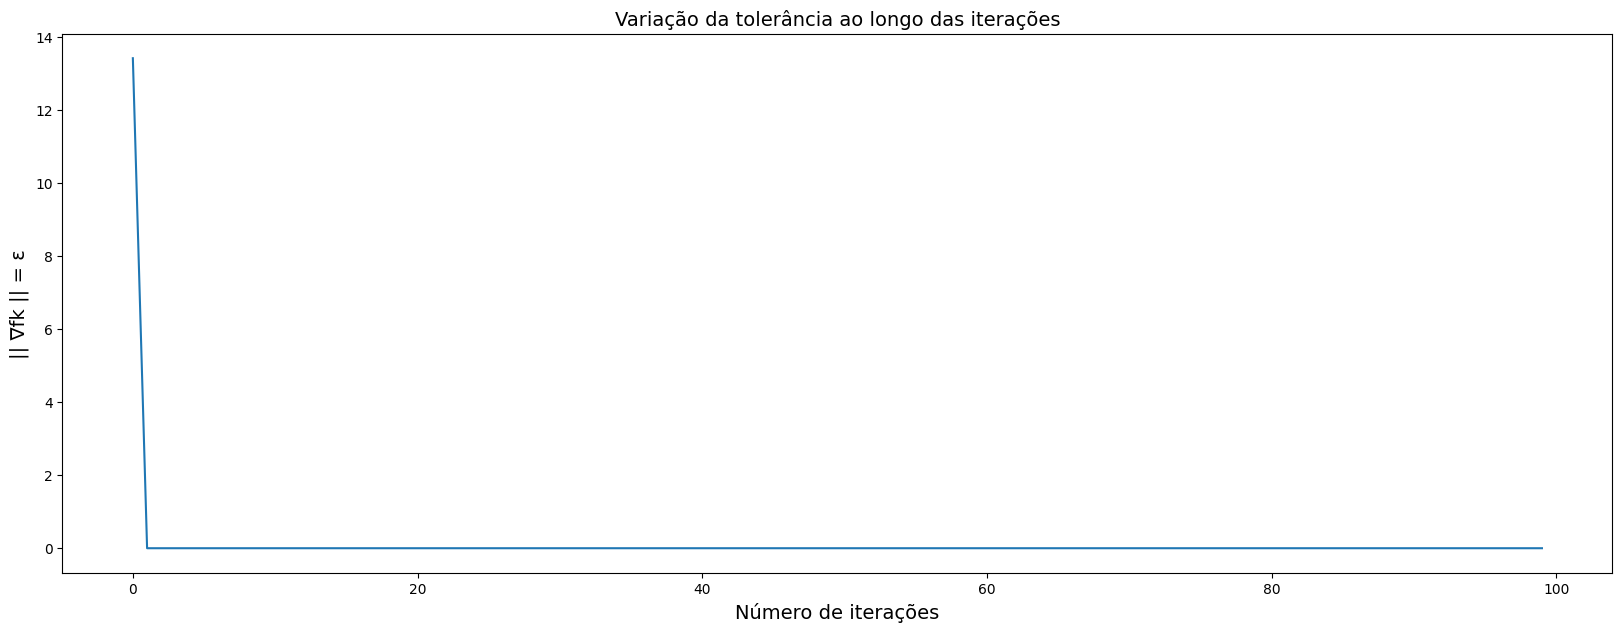

In [26]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_tolerancia)
plt.title('Variação da tolerância ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('|| ∇fk || = ε', fontsize = 14)
plt.savefig("03 - Método do Gradiente");

## Gráfico do alpha

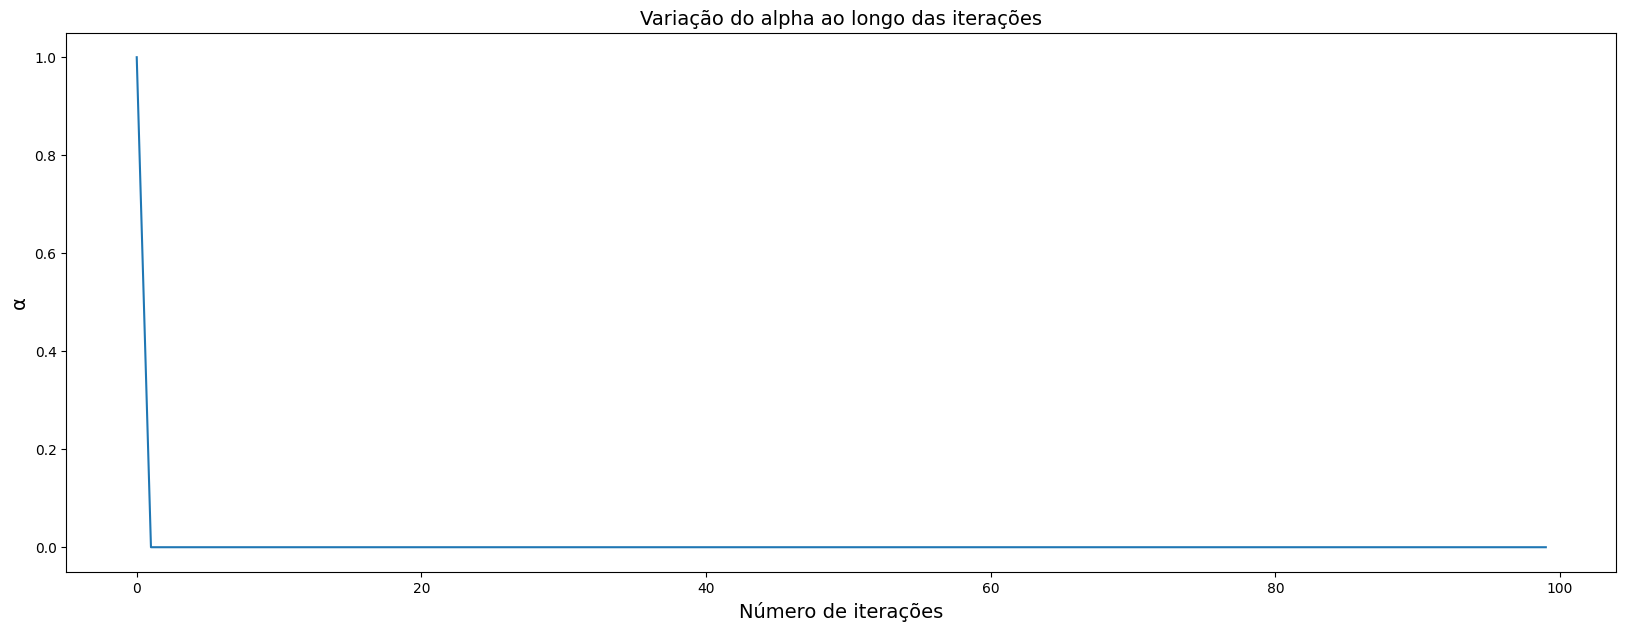

In [27]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_alpha)
plt.title('Variação do alpha ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('α', fontsize = 14)
plt.savefig("04 - Alpha");

## Gráfico da trajetória do ponto na curva de nível

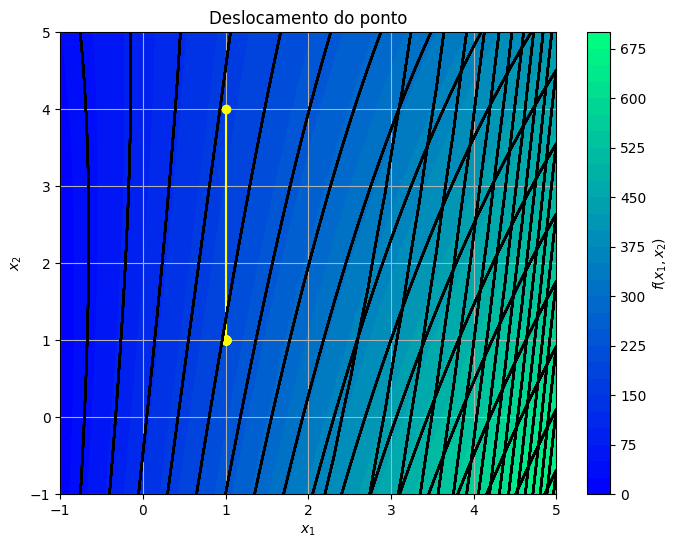

In [28]:
# Valor inicial do gráfico
valor_inicial = -1

# Valor final do gráfico
valor_final = 5

pontos = 30

equacao_matematica = 'x**4 - 2*(x**2)*(y) + y**2 + x**2 - 2*x + 5'

#============================================================================

vetor = np.linspace(valor_inicial, valor_final, pontos)
x, y = np.meshgrid(vetor, vetor)
z = ne.evaluate(equacao_matematica)

#============================================================================

# Gerar dados para o exemplo (por exemplo, uma função bidimensional)
X, Y = np.meshgrid(x, y)
Z = X**4 - 2*(X**2)*(Y) + Y**2 + X**2 - 2*X + 5


plt.figure(figsize=(8, 6))

plt.plot(lista_x, lista_y, marker='o', linestyle='-', color = 'yellow')

contour = plt.contourf(X, Y, Z, levels=30, cmap = 'winter')
plt.contour(X, Y, Z, colors='black', levels=20, alpha=0.7, linestyles = 'solid')

# plt.scatter(1, 4, color = 'red', s = 20, label = 'Ponto inicial')
# plt.scatter(1, 1, color = 'yellow', s = 20, label = 'Ponto estacionário')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Deslocamento do ponto')
plt.colorbar(contour, label = '$f(x_1, x_2)$')
# plt.legend()
plt.grid(True)
plt.savefig("02 - Mapa de contorno")
plt.show()

# Método de Quase-Newton-BFGS

## Funções auxiliares

In [29]:
def func_yk(x_inicial, y_inicial, proximo_ponto, df_dx, df_dy):

    df_dx_1 = df_dx.subs([(x, x_inicial), (y, proximo_ponto[0][0])])
    df_dy_1 = df_dx.subs([(x, x_inicial), (y, proximo_ponto[1][0])])

    df_dx_0 = df_dx.subs([(x, x_inicial), (y, y_inicial)])
    df_dy_0 = df_dx.subs([(x, x_inicial), (y, y_inicial)])

    valor_yk = np.array([(df_dx_1 - df_dx_0), (df_dy_1 - df_dy_0)])

    return valor_yk

In [30]:
def ponto_direcao_quase_newton_BFGS(x_inicial, y_inicial, df_dx, df_dy, Hk0):

    # Converte o ponto inicial em um vetor coluna
    ponto = np.array([x_inicial, y_inicial]).reshape(-1, 1)

    #====================================================================================================

    df_dx = float(df_dx.subs([(x, x_inicial), (y, y_inicial)]))
    df_dy = float(df_dy.subs([(x, x_inicial), (y, y_inicial)]))
    gradiente_0 = np.array([df_dx, df_dy]).reshape(-1, 1)

    #====================================================================================================

    direcao = -(Hk0 @ gradiente_0)

    # Transforma o gradiente em direção e depois em vetor coluna
    direcao = direcao.reshape(2, -1)

    return ponto, direcao

## Função principal

In [31]:
# Definindo as variáveis da função
# x = x1, y = x2
x, y, alpha = sp.symbols('x y alpha')

# Definindo a função onde: x = x1 e y = x2
f = x**4 - 2*(x**2)*y + y**2 + x**2 - 2*x + 5
f_original = f

# Definindo o ponto inicial
x_inicial, y_inicial = 1, 4

Hk0 = np.eye(2)

# True = As iterações serão encerradas assim que a tolerância for alcançada
# False = As iterações serão encerradas assim que a quantidade de iterações totais forem executadas
limitador_tolerancia = False

# Valor da tolerância
valor_limitador_tolerancia = 10**(-7)

#===============================================================================================

lista_tolerancia = []
lista_alpha = []
lista_x = []
lista_y = []

for _ in tqdm(range(100)):

    # Retorna a derivada da função em relação a x e y, em outras palavras, o gradiente
    df_dx, df_dy = derivada(f)

    # Retorna os vetores colunas do ponto e da direção
    ponto, direcao = ponto_direcao_quase_newton_BFGS(x_inicial, y_inicial, df_dx, df_dy, Hk0)

    # Retorna o próximo x_{k + 1} = x_k + alpha * direcao
    # Todas as variáveis já foram encontradas exceto o alpha
    x_k1 = xk1(ponto, direcao)

    # Utilizando o método de busca linear inexata
    melhor_alpha = 0.05 # 0.05  0.005

    # Subtitui o valor do alpha em x_{k + 1} = x_k + alpha * direcao, e encontra o próximo ponto
    proximo_ponto = funcao_proximo_ponto(x_k1, melhor_alpha)

    yk = func_yk(x_inicial, y_inicial, proximo_ponto, df_dx, df_dy)
    sk = np.array([(proximo_ponto[0][0] - x_inicial), (proximo_ponto[1][0] - y_inicial)])
    pk = 1 /((yk.T)@ sk)
    Hk1 = (np.eye(2) - (pk * (sk @ yk.T))) @ Hk0 @ (np.eye(2) - (pk * (yk @ sk.T))) + (pk * (sk @ sk.T))
    Hk0 = Hk1

    proximo_ponto, melhor_alpha = condicoes_wolfe(f, proximo_ponto, ponto, melhor_alpha, df_dx, df_dy, direcao)

    # Calcula a tolerância, substitui o ponto atual na derivada da função
    valor_tolerancia = tolerancia(float(x_inicial), float(y_inicial), df_dx, df_dy)

    # Registro dos elementos ao longo das iterações
    lista_alpha.append(melhor_alpha)
    lista_tolerancia.append(valor_tolerancia)
    lista_x.append(x_inicial)
    lista_y.append(y_inicial)

    # Verifica se as iterações serão interrompidas assim que a tolerância for alcançada ou não
    if limitador_tolerancia and (valor_tolerancia < valor_limitador_tolerancia):
        break

    x_inicial = float(proximo_ponto[0][0])
    y_inicial = float(proximo_ponto[1][0])

100%|██████████| 100/100 [00:02<00:00, 36.28it/s]


## Criação do Dataframe

In [32]:
df_newton = pd.DataFrame({'tolerancia': lista_tolerancia,
                  'alpha': lista_alpha,
                  'x': lista_x,
                  'y': lista_y})

display(df_newton)

,tolerancia,alpha,x,y
0,1.341641e+01,0.05,1.000000,4.000000
1,6.508427e+00,0.05,1.600000,3.700000
2,2.517299e+00,0.05,1.920700,3.601900
3,1.677114e+00,0.05,1.781740,3.597222
4,9.344063e-01,0.05,1.857326,3.558118
...,...,...,...,...
95,7.660614e-08,5.03523326191849e-17,1.000000,1.000000
96,7.660614e-08,1.07352409471527e-15,1.000000,1.000000
97,7.660614e-08,6.58250505653367e-19,1.000000,1.000000
98,7.660614e-08,1.04980172548811e-14,1.000000,1.000000


## Gráfico da tolerância

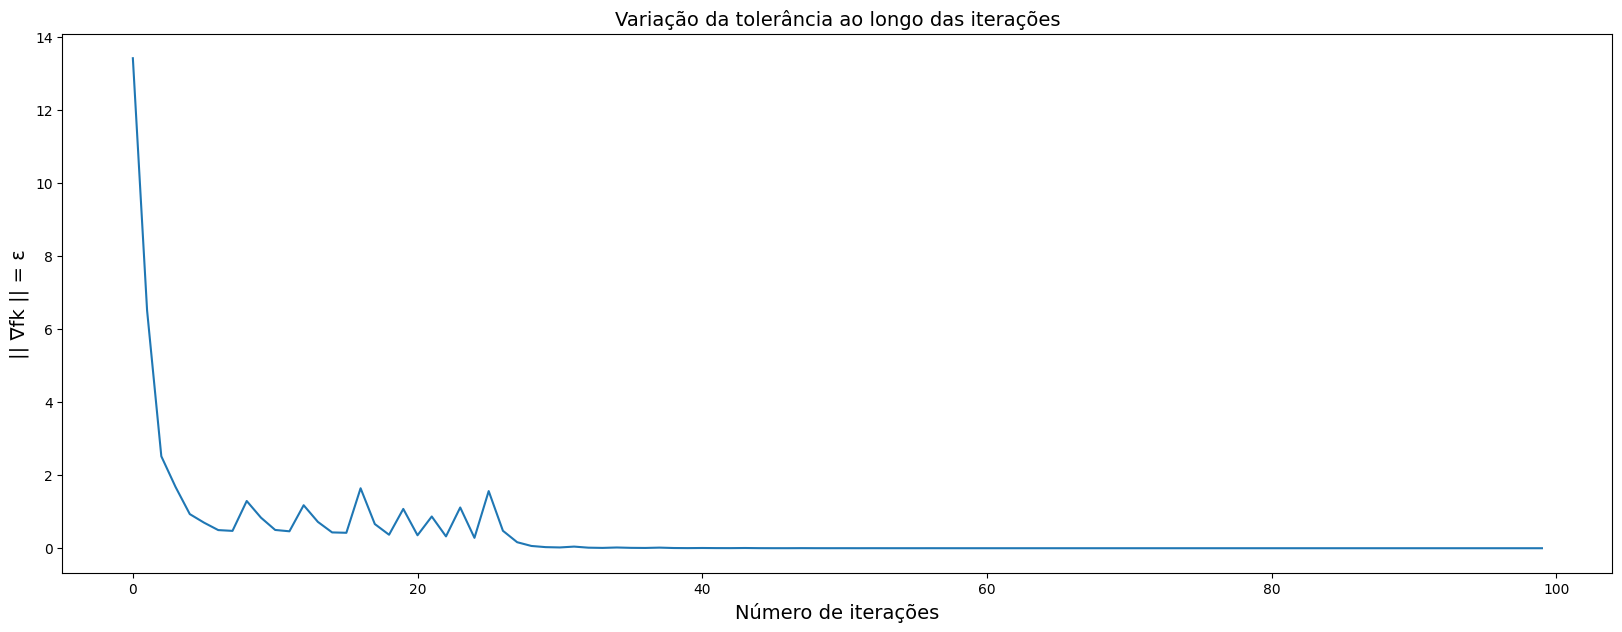

In [33]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_tolerancia)
plt.title('Variação da tolerância ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('|| ∇fk || = ε', fontsize = 14)
plt.savefig("03 - Método do Gradiente");

## Gráfico do alpha

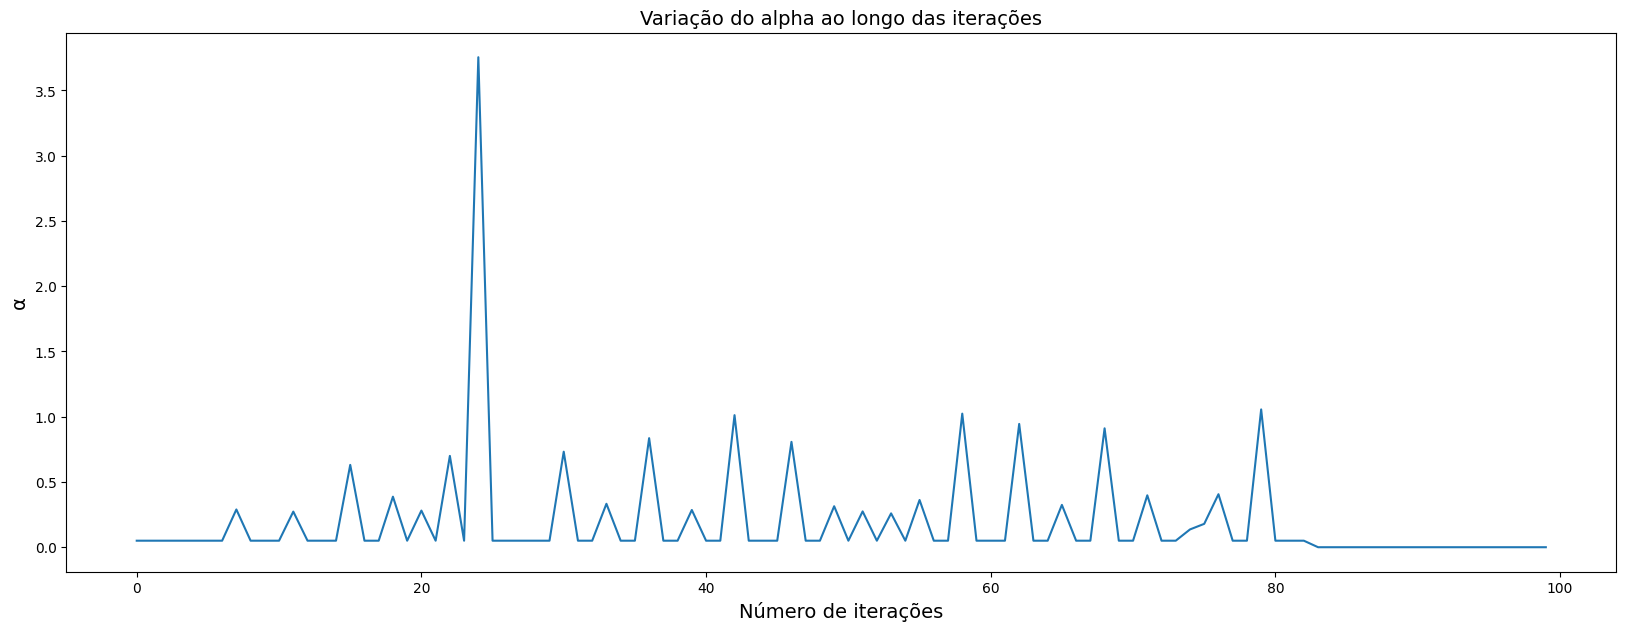

In [34]:
plt.figure(figsize= (20, 7))

# Criar um gráfico de linha
plt.plot(lista_alpha)
plt.title('Variação do alpha ao longo das iterações', fontsize = 14)
plt.xlabel('Número de iterações', fontsize = 14)
plt.ylabel('α', fontsize = 14)
plt.savefig("04 - Alpha");

## Gráfico da trajetória do ponto na curva de nível

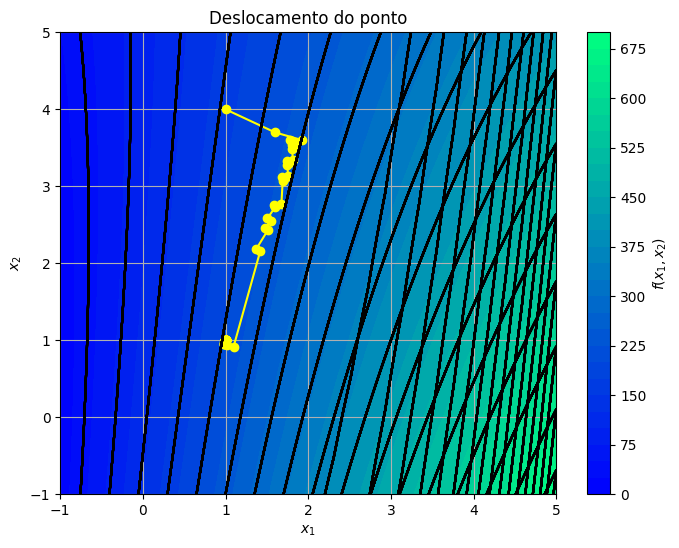

In [35]:
# Valor inicial do gráfico
valor_inicial = -1

# Valor final do gráfico
valor_final = 5

pontos = 30

equacao_matematica = 'x**4 - 2*(x**2)*(y) + y**2 + x**2 - 2*x + 5'

#============================================================================

vetor = np.linspace(valor_inicial, valor_final, pontos)
x, y = np.meshgrid(vetor, vetor)
z = ne.evaluate(equacao_matematica)

#============================================================================

# Gerar dados para o exemplo (por exemplo, uma função bidimensional)
X, Y = np.meshgrid(x, y)
Z = X**4 - 2*(X**2)*(Y) + Y**2 + X**2 - 2*X + 5


plt.figure(figsize=(8, 6))

plt.plot(lista_x, lista_y, marker='o', linestyle='-', color = 'yellow')

contour = plt.contourf(X, Y, Z, levels=30, cmap = 'winter')
plt.contour(X, Y, Z, colors='black', levels=20, alpha=0.7, linestyles = 'solid')

# plt.scatter(1, 4, color = 'red', s = 20, label = 'Ponto inicial')
# plt.scatter(1, 1, color = 'yellow', s = 20, label = 'Ponto estacionário')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Deslocamento do ponto')
plt.colorbar(contour, label = '$f(x_1, x_2)$')
# plt.legend()
plt.grid(True)
plt.savefig("02 - Mapa de contorno")
plt.show()